# Data information
- 코로나바이러스감염증-19(COVID-19) 현황 누적 데이터 (2021.01.28)
- https://kdx.kr/data/view/25918

In [34]:
import pandas as pd
import missingno as msno

## Covid19InfState.csv

1. seq : 고유값
2. stateDt : 기준일
3. stateTime : 기준시간
4. decideCnt : 확진자 수
5. clearCnt : 격리해제 수
6. examCnt : 검사진행 수
7. deathCnt : 사망자 수
8. careCnt : 치료중 환자 수
9. resultNegCnt : 결과 음성 수
10. accExamCnt : 누적 검사 수
11. accExamCompCnt : 누적 검사 완료 수
12. accDefRate : 누적 확진률
13. createDt : 등록일(시분초)
14. updateDt : 수정일(시분초)

In [33]:
df_state = pd.read_csv("data_public/Covid19InfState.csv")

In [38]:
df_state.shape

(399, 14)

In [39]:
df_state.head()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,1,20200101,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.33,2020-02-03 12:21:56.56
1,2,20200202,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.49,NaN
2,3,20200203,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.17,2020-02-04 14:19:46.46
3,4,20200204,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.59,NaN
4,5,20200205,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.31,2020-02-05 9:43:16.16


<AxesSubplot:>

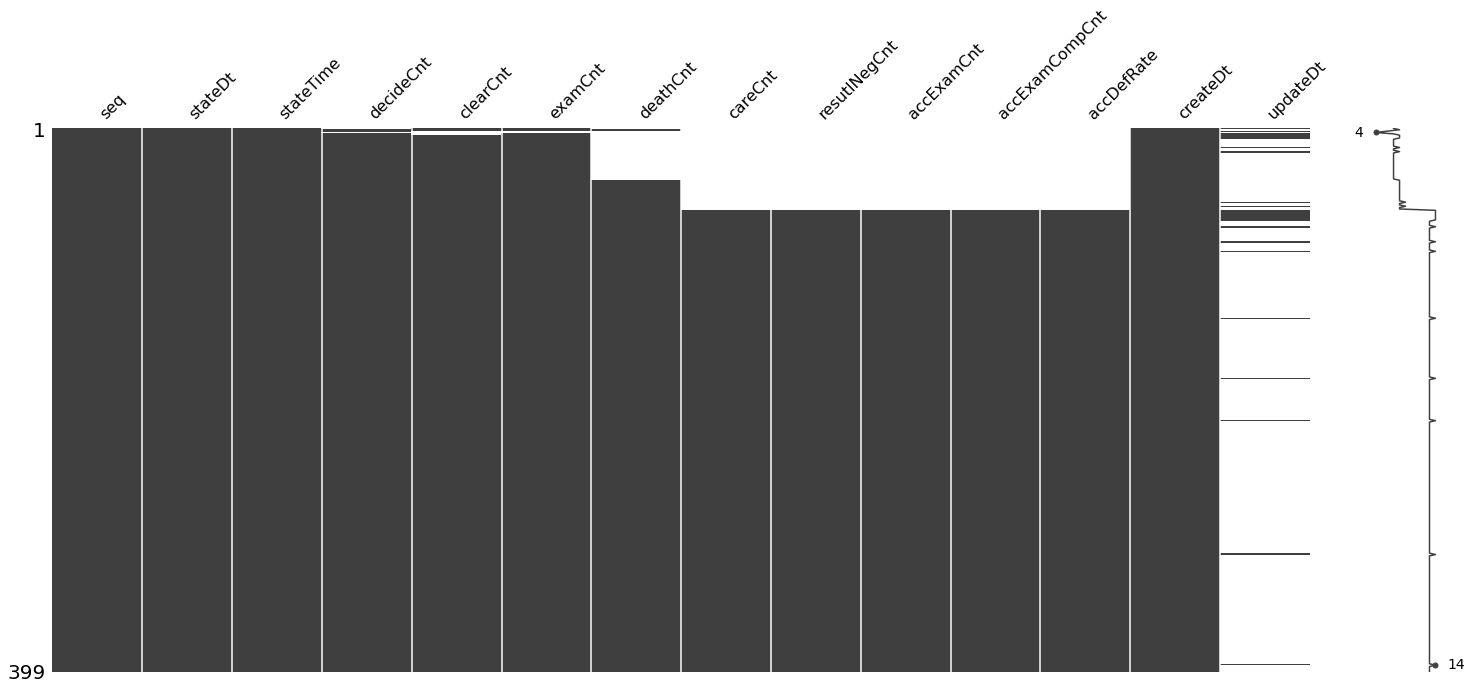

In [37]:
msno.matrix(df_state)

## Covid19GenAgeCaseInf.csv

1. seq : 고유값
2. gubun : 구분
3. confCase : 확진자
4. confCaseRate : 확진률
5. death : 사망자
6. deathRate : 사망률
7. criticalRate : 치명률
8. createDt : 등록일시(시분초)
9. updateDt : 수정일시(시분초)

In [5]:
df_info = pd.read_csv("data_public/Covid19GenAgeCaseInf.csv")

In [6]:
df_info.shape

(3169, 9)

In [24]:
df_info.describe()

,seq,confCase,confCaseRate,death,deathRate,criticalRate,updateDt
count,3169.000000,3169.000000,3169.000000,2305.000000,3160.000000,2305.000000,0.0
mean,3007.995267,4520.028716,18.176403,109.282863,18.228247,4.569796,NaN
std,1912.130774,5871.965656,16.342331,132.468454,21.387116,7.126969,NaN
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.030000,NaN
25%,1366.000000,1177.000000,5.740000,10.000000,0.000000,0.260000,NaN
50%,2862.000000,2576.000000,13.100000,77.000000,5.180000,1.550000,NaN
75%,4655.000000,5346.000000,19.270000,152.000000,46.890000,3.040000,NaN
max,6491.000000,38948.000000,60.100000,770.000000,56.770000,26.680000,NaN


In [10]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   seq           3169 non-null   int64  
 1   gubun         3169 non-null   object 
 2   confCase      3169 non-null   int64  
 3   confCaseRate  3169 non-null   float64
 4   death         2305 non-null   float64
 5   deathRate     3160 non-null   float64
 6   criticalRate  2305 non-null   float64
 7   createDt      3169 non-null   object 
 8   updateDt      0 non-null      float64
dtypes: float64(5), int64(2), object(2)
memory usage: 222.9+ KB


In [7]:
df_info.head()

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
0,1,남성,3905,39.90,82.0,50.62,2.10,2020-04-02 19:02:48.48,NaN
1,2,여성,5881,60.10,80.0,49.38,1.36,2020-04-02 19:02:48.48,NaN
2,3,80 이상,442,4.52,82.0,50.62,18.55,2020-04-02 19:02:48.48,NaN
3,4,70-79,651,6.65,46.0,28.40,7.07,2020-04-02 19:02:48.48,NaN
4,5,60-69,1235,12.62,22.0,13.58,1.78,2020-04-02 19:02:48.48,NaN


In [25]:
df_info.tail()

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
3164,6487,40-49,10946,14.32,10.0,0.73,0.09,2021-01-27 14:14:31.564,NaN
3165,6488,30-39,9765,12.78,6.0,0.44,0.06,2021-01-27 14:14:31.564,NaN
3166,6489,20-29,11743,15.36,NaN,0.00,NaN,2021-01-27 14:14:31.564,NaN
3167,6490,10-19,5051,6.61,NaN,0.00,NaN,2021-01-27 14:14:31.565,NaN
3168,6491,0-9,2883,3.77,NaN,0.00,NaN,2021-01-27 14:14:31.565,NaN


<AxesSubplot:>

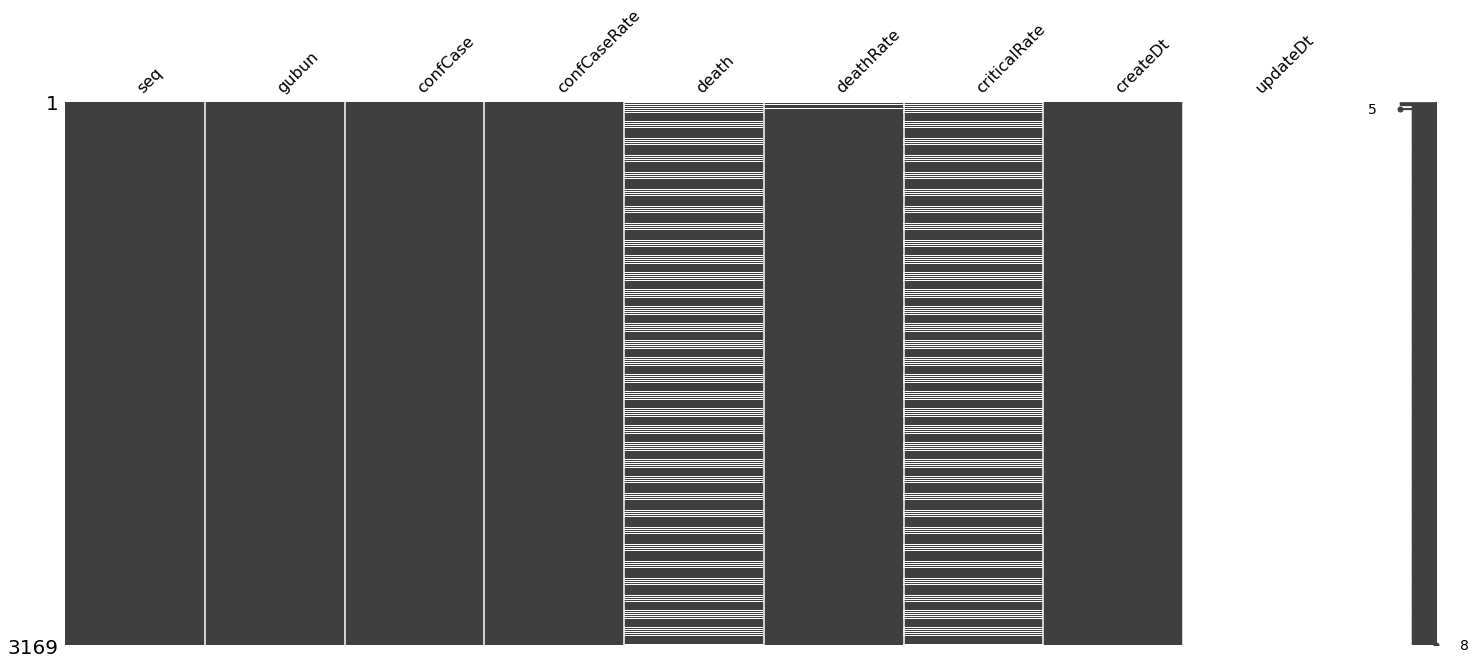

In [36]:
msno.matrix(df_info)

In [28]:
df_info[df_info['gubun']=="남성"].head(20)

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
0,1,남성,3905,39.90,82.0,50.62,2.10,2020-04-02 19:02:48.48,NaN
11,12,남성,4138,40.05,101.0,52.60,2.44,2020-04-07 19:32:08.08,NaN
23,24,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 10:55:38.38,NaN
34,35,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 10:56:57.57,NaN
45,46,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 10:58:36.36,NaN
56,58,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 11:33:25.25,NaN
67,69,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 11:34:40.40,NaN
78,80,남성,4185,40.15,107.0,52.45,2.56,2020-04-09 10:23:55.55,NaN
89,91,남성,4200,40.19,109.0,52.40,2.60,2020-04-10 10:17:34.34,NaN
100,102,남성,4215,40.22,111.0,52.61,2.63,2020-04-11 10:29:51.51,NaN
